<a href="https://colab.research.google.com/github/divyakshib/Stock-Prediction/blob/master/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [0]:
from google.colab import files
files.upload()

{}

In [0]:
scaler=MinMaxScaler(range(0,1))
df=pd.read_csv('NSE-TATAGLOBAL11.csv')
print(df.head())

         Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
0  2018-10-08  208.00  222.25  ...  215.15             4642146.0         10062.83
1  2018-10-05  217.00  218.60  ...  209.20             3519515.0          7407.06
2  2018-10-04  223.50  227.80  ...  218.20             1728786.0          3815.79
3  2018-10-03  230.00  237.50  ...  227.60             1708590.0          3960.27
4  2018-10-01  234.55  234.60  ...  230.90             1534749.0          3486.05

[5 rows x 8 columns]


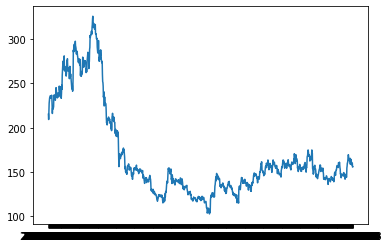

In [0]:

plt.plot(df['Date'],df['Close'])

In [0]:
data=df.sort_index(axis=0,ascending=True)
new_data=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(len(data)):
    new_data['Date'][i]=data['Date'][i]
    new_data['Close'][i]=data['Close'][i]


In [0]:
print(new_data.head())

         Date   Close
0  2018-10-08  215.15
1  2018-10-05   209.2
2  2018-10-04   218.2
3  2018-10-03   227.6
4  2018-10-01   230.9


In [0]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(new_data,shuffle=False,train_size=0.9,random_state=48)
print(train)
print(test)
num=train.shape[0]
print(num)

            Date   Close
0     2018-10-08  215.15
1     2018-10-05   209.2
2     2018-10-04   218.2
3     2018-10-03   227.6
4     2018-10-01   230.9
...          ...     ...
1106  2014-04-11  152.75
1107  2014-04-10   153.1
1108  2014-04-09   154.4
1109  2014-04-07  151.45
1110  2014-04-04   152.2

[1111 rows x 2 columns]
            Date   Close
1111  2014-04-03  151.55
1112  2014-04-02   153.5
1113  2014-04-01  154.25
1114  2014-03-31  150.05
1115  2014-03-28     148
...          ...     ...
1230  2013-10-14  159.45
1231  2013-10-11  160.05
1232  2013-10-10  160.15
1233  2013-10-09  155.55
1234  2013-10-08   155.8

[124 rows x 2 columns]
1111


In [0]:
predictions=[]
window=test.shape[0]
for i in range(window):
    pred=sum(predictions)+train['Close'][i+num-window:].sum()
    predictions.append(pred/window)
for i in range(window):
    print(predictions[i],test['Close'][i+num])
    

157.62661290322575 151.55
157.5973920395421 153.5
157.576000039861 154.25
157.56612907244053 150.05
157.5557752746376 148.0
157.54130572040083 141.8
157.5295420568557 142.75
157.5124415895723 142.9
157.48996127981079 142.85
157.4314125804544 143.65
157.37481106900645 143.4
157.26815631956296 141.4
157.1767704834304 141.3
157.1148896002323 143.15
157.07871935507288 142.7
157.0595961240654 142.55
156.97781867345302 145.65
156.876430114368 145.15
156.79156261529027 143.8
156.74512360412328 143.3
156.6769391170598 142.55
156.61304346477797 140.9
156.56758413788103 140.4
156.52216142931556 135.95
156.54048531181004 139.7
156.54968277400206 139.8
156.57105118346982 141.2
156.6200112736591 142.7
156.6483984613499 142.0
156.67822425539305 141.1
156.68812928971073 140.35
156.6981142033374 140.2
156.6948731888482 138.9
156.68031571456473 140.55
156.68176987355315 141.75
156.70017124350116 144.05
156.7372693986907 144.85
156.78232802287368 143.6
156.80113711983236 143.35
156.84066241918583 141.15

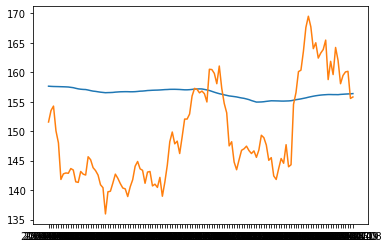

In [0]:
plt.plot(test['Date'],predictions)
plt.plot(test['Date'],test['Close'])
plt.show()

In [0]:
RME=np.sqrt(np.mean(np.power(np.array(predictions-test['Close']),2)))
print(RME)

10.763593248838587


In [0]:
#LINEAR REGRESSION

In [0]:
from sklearn.linear_model import LinearRegression
import datetime
import time
print(new_data.shape[0])
for i in range(new_data.shape[0]):
    new_data['Date'][i]=time.mktime(datetime.datetime.strptime(str(new_data['Date'][i]),'%Y-%m-%d').timetuple())  


1235


In [0]:
x_train=new_data['Date'][:1111]
x_test=new_data['Date'][1111:]
y_train=new_data['Close'][:1111]
y_test=new_data['Close'][1111:]   

In [0]:

x_train=np.array(x_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)
lr=LinearRegression()
lr.fit(x_train,y_train)
predictions_lr=lr.predict(x_test)
print(lr.score(x_test,y_test))

-33.00688862292609


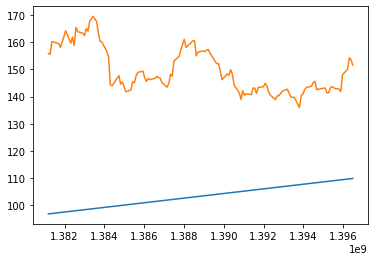

In [0]:
plt.plot(x_test,predictions_lr)
plt.plot(x_test,y_test)
plt.show()

In [0]:
from sklearn import neighbors 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
scaler=MinMaxScaler(feature_range=(0,1))

In [0]:
train=x_train
test=x_test
x_train_scaled=scaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train_scaled)
x_test_scaled=scaler.fit_transform(x_test)
x_test=pd.DataFrame(x_test_scaled)
knn=neighbors.KNeighborsRegressor()
params={'n_neighbors':[2,6,7,9,12],'weights':['uniform','distance'], 'metric':['euclidean','manhattan']}
model=GridSearchCV(knn,params,cv=6,verbose=1,n_jobs=-1)
model.fit(x_train,y_train)


Fitting 6 folds for each of 20 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 6, 7, 9, 12],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [0]:
print(model.score(x_test,y_test))

-54.32515376419775


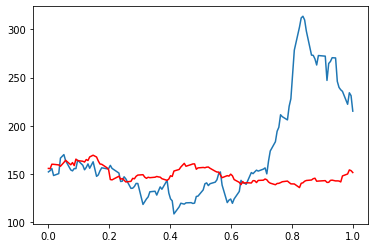

In [0]:
predictions_knn=model.predict(x_test)
plt.plot(x_test,predictions_knn)
plt.plot(x_test,y_test,color='red')
plt.show()

In [0]:
#sklearn.neighbors.KNeighborsClassifier not working

In [0]:
knn2=neighbors.NearestNeighbors(n_neighbors=4)
y_train[0]='Close'
print(x_train)
print(y_train)
knn2.fit(x_train,y_train)


             0
0     1.000000
1     0.998180
2     0.997573
3     0.996966
4     0.995752
...        ...
1106  0.004248
1107  0.003641
1108  0.003034
1109  0.001820
1110  0.000000

[1111 rows x 1 columns]
0        Close
1        209.2
2        218.2
3        227.6
4        230.9
         ...  
1106    152.75
1107     153.1
1108     154.4
1109    151.45
1110     152.2
Name: Close, Length: 1111, dtype: object


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                 radius=1.0)

In [0]:
#use other features find correlation using pandas
#multivariate regression

In [0]:
for i in range(new_data.shape[0]):
    df['Date'][i]=new_data['Date'][i]
X=df[["Date","Open","High","Low","Last"]]
Y=df['Close']
x_train,x_test=train_test_split(X,train_size=0.7,random_state=48,shuffle=False)
y_train,y_test=train_test_split(Y,train_size=0.7,random_state=48,shuffle=False)
lr.fit(x_train,y_train)
predictions_mlr=lr.predict(x_test)
print(lr.score(x_test,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.9978656010205792


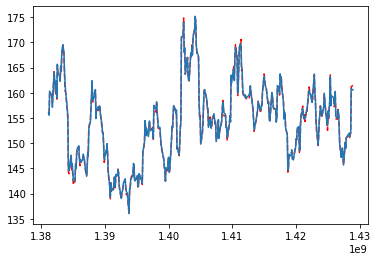

In [0]:
plt.plot(x_test['Date'],y_test,color='red',linestyle='--')
plt.plot(x_test['Date'],predictions_mlr)

plt.show()

In [0]:
print(df.corr(method='pearson'))

                          Open      High  ...  Total Trade Quantity  Turnover (Lacs)
Open                  1.000000  0.998956  ...              0.367503         0.587026
High                  0.998956  1.000000  ...              0.388798         0.605907
Low                   0.998776  0.998728  ...              0.361695         0.582446
Last                  0.997662  0.999130  ...              0.381269         0.599575
Close                 0.997704  0.999159  ...              0.380801         0.599155
Total Trade Quantity  0.367503  0.388798  ...              1.000000         0.941976
Turnover (Lacs)       0.587026  0.605907  ...              0.941976         1.000000

[7 rows x 7 columns]


In [0]:
!pip install pmdarima

In [0]:
from pmdarima.arima import auto_arima

model = auto_arima(y_train, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4804.993, BIC=4828.725, Fit time=12.573 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5396.758, BIC=5406.251, Fit time=0.088 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5112.958, BIC=5131.944, Fit time=2.252 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4803.013, BIC=4821.998, Fit time=7.166 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5394.758, BIC=5399.505, Fit time=0.064 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=5399.484, BIC=5418.470, Fit time=1.769 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=4802.756, BIC=4831.235, Fit time=15.447 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (a

In [0]:
model.fit(y_train)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

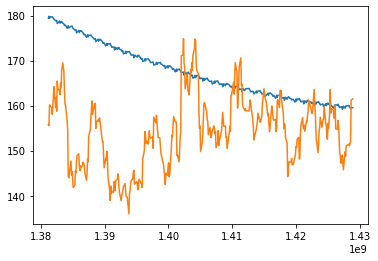

In [0]:
forecast=model.predict(n_periods=371)
forecast=pd.DataFrame(forecast,index=x_test.index,columns=['Predictions'])
plt.plot(x_test['Date'],forecast['Predictions'])
plt.plot(x_test['Date'],y_test)
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM


In [0]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train)

[[[1.00000000e+00]
  [4.67289720e-01]
  [5.24871738e-01]
  [4.82066321e-01]
  [5.07723304e-01]]

 [[9.97641509e-01]
  [5.07343124e-01]
  [5.08587999e-01]
  [4.77780284e-01]
  [4.81978957e-01]]

 [[9.96855346e-01]
  [5.36270583e-01]
  [5.49631943e-01]
  [5.24024363e-01]
  [5.13319901e-01]]

 ...

 [[1.57232704e-03]
  [2.50333778e-01]
  [2.52509480e-01]
  [2.57162193e-01]
  [2.44683233e-01]]

 [[7.86163522e-04]
  [2.48776146e-01]
  [2.48271247e-01]
  [2.52876156e-01]
  [2.54085516e-01]]

 [[0.00000000e+00]
  [2.60124611e-01]
  [2.62770466e-01]
  [2.60997067e-01]
  [2.50951422e-01]]]


In [0]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,epochs=10,batch_size=2,verbose=2)

Epoch 1/10
 - 5s - loss: 27907.4411
Epoch 2/10
 - 4s - loss: 21454.8353
Epoch 3/10
 - 4s - loss: 16769.1607
Epoch 4/10
 - 4s - loss: 13078.0413
Epoch 5/10
 - 4s - loss: 10214.8737
Epoch 6/10
 - 4s - loss: 8056.4254
Epoch 7/10
 - 4s - loss: 6475.7897
Epoch 8/10
 - 4s - loss: 5364.8170
Epoch 9/10
 - 4s - loss: 4629.6669
Epoch 10/10
 - 4s - loss: 4173.9511


In [0]:
x_test,y_test=np.array(x_test),np.array(y_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
closing_price=model.predict(x_train)
print(closing_price-155.497)

[[0.22787476]
 [0.2278595 ]
 [0.2278595 ]
 [0.22784424]
 [0.22784424]
 [0.22784424]
 [0.22784424]
 [0.22782898]
 [0.22782898]
 [0.22781372]
 [0.22781372]
 [0.22781372]
 [0.22781372]
 [0.22781372]
 [0.2277832 ]
 [0.2277832 ]
 [0.2277832 ]
 [0.2277832 ]
 [0.22776794]
 [0.22776794]
 [0.22776794]
 [0.22775269]
 [0.22775269]
 [0.22775269]
 [0.22775269]
 [0.22775269]
 [0.22773743]
 [0.22773743]
 [0.22772217]
 [0.22772217]
 [0.22772217]
 [0.22772217]
 [0.22770691]
 [0.22769165]
 [0.22769165]
 [0.22769165]
 [0.22767639]
 [0.22767639]
 [0.22767639]
 [0.22767639]
 [0.22766113]
 [0.22764587]
 [0.22766113]
 [0.22763062]
 [0.22764587]
 [0.22763062]
 [0.22763062]
 [0.22761536]
 [0.22761536]
 [0.22761536]
 [0.22761536]
 [0.2276001 ]
 [0.22758484]
 [0.22758484]
 [0.22758484]
 [0.22758484]
 [0.22758484]
 [0.22756958]
 [0.22756958]
 [0.22756958]
 [0.22756958]
 [0.22755432]
 [0.22753906]
 [0.22753906]
 [0.2275238 ]
 [0.22753906]
 [0.22750854]
 [0.22750854]
 [0.22750854]
 [0.22750854]
 [0.22750854]
 [0.22

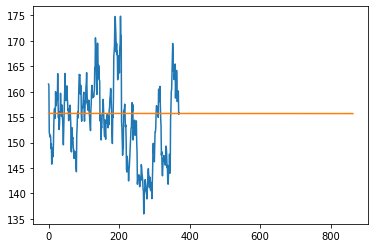

In [0]:
plt.plot(y_test)
plt.plot(closing_price)

In [0]:
rms=np.sqrt(np.mean(np.power((y_test-closing_price),2)))
print(rms)

7.856002431223334


In [0]:
!pip install tensorflow

In [0]:
!pip install TFANN
from TFANN import ANNR

In [0]:
input=1
output=1
hidden=50
layers=[('F',hidden),('AF','tanh'),('F',hidden),('AF','tanh'),['F',hidden],('AF','tanh'),('F',output)]
mlpr=ANNR([input],layers,batchSize=256,learnRate=0.0001,maxIter=10000,tol=0.2,reg=1e-4,verbose=True)

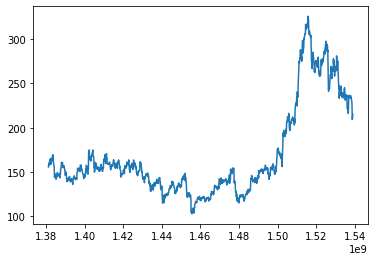

In [0]:
dates=np.array(df['Date']).reshape(-1,1)
prices=np.array(df['Close']).reshape(-1,1)
plt.plot(df['Date'],df['Close'])


In [0]:
holdDays = 5
totalDays = len(dates)
mlpr.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	  31010.08945313 (Batch Size:   256)
Iter     2	  30892.46132812 (Batch Size:   256)
Iter     3	  31336.42734375 (Batch Size:   256)
Iter     4	  30366.88398437 (Batch Size:   256)
Iter     5	  31868.50703125 (Batch Size:   256)
Iter     6	  30943.46601562 (Batch Size:   256)
Iter     7	  30979.73945312 (Batch Size:   256)
Iter     8	  30164.95585938 (Batch Size:   256)
Iter     9	  31166.03515625 (Batch Size:   256)
Iter    10	  30632.51445313 (Batch Size:   256)
Iter    11	  30274.07812500 (Batch Size:   256)
Iter    12	  31251.93281250 (Batch Size:   256)
Iter    13	  30585.19765625 (Batch Size:   256)
Iter    14	  30294.30937500 (Batch Size:   256)
Iter    15	  31314.68007812 (Batch Size:   256)
Iter    16	  29813.45039062 (Batch Size:   256)
Iter    17	  29997.30976562 (Batch Size:   256)
Iter    18	  29585.40664062 (Batch Size:   256)
Iter    19	  30366.94648437 (Batch Size:   256)
Iter    20	  29861.19140625 (Batch Size:   256)
Iter    21	  30147.15859375 (Batch Size:

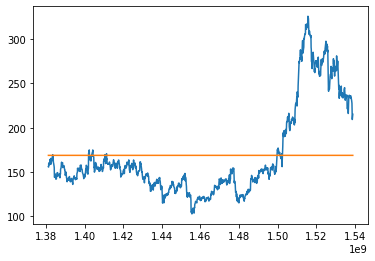

In [0]:
predictions_tf=mlpr.predict(dates)
plt.plot(dates,prices)

plt.plot(dates,predictions_tf)
plt.show()

Iter     1	  31092.73476562 (Batch Size:   256)
Iter     2	  31482.30273438 (Batch Size:   256)
Iter     3	  31026.50507812 (Batch Size:   256)
Iter     4	  30279.05507812 (Batch Size:   256)
Iter     5	  30002.18398437 (Batch Size:   256)
Iter     6	  29899.49570313 (Batch Size:   256)
Iter     7	  30448.44492188 (Batch Size:   256)
Iter     8	  30072.39023438 (Batch Size:   256)
Iter     9	  30284.29101562 (Batch Size:   256)
Iter    10	  30370.81250000 (Batch Size:   256)
Iter    11	  30152.86953125 (Batch Size:   256)
Iter    12	  30902.26054688 (Batch Size:   256)
Iter    13	  30726.00937500 (Batch Size:   256)
Iter    14	  30827.06601563 (Batch Size:   256)
Iter    15	  30601.21015625 (Batch Size:   256)
Iter    16	  29898.14531250 (Batch Size:   256)
Iter    17	  29137.33906250 (Batch Size:   256)
Iter    18	  29312.16953125 (Batch Size:   256)
Iter    19	  29733.04335937 (Batch Size:   256)
Iter    20	  29101.82148437 (Batch Size:   256)
Iter    21	  29528.30390625 (Batch Size:

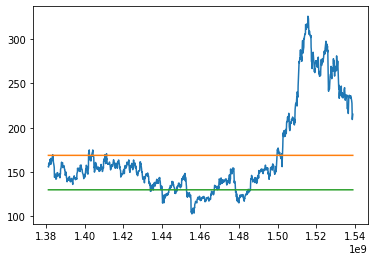

In [0]:
input2=1
output2=1
hidden2=50
layers=[('F',hidden2),('AF','tanh'),('F',hidden2),('AF','tanh'),('F',hidden2),('AF','tanh'),('F',output2)]
m2=ANNR([input2],layers,batchSize=256,maxIter=5000,tol=0.1,reg=1e-4,verbose=True)
m2.fit(dates[0:(totalDays-holdDays)],prices[0:(totalDays-holdDays)])
predict2=m2.predict(dates)
plt.plot(dates,prices)
plt.plot(dates,predictions_tf)
plt.plot(dates,predict2)
plt.show()